In [3]:
import pandas as pd
import numpy as np ## calculate mean and SD 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV   ## cross validation
from sklearn.metrics import confusion_matrix    ## creates confusion matrix
from sklearn.metrics import plot_confusion_matrix  ## draws confusion matrix

In [4]:
df = pd.read_csv('Telco.csv')


In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


The last four features/columns have info of exit and should not be used for prediction, so we will remove them.


In [6]:
df1= df.copy()  ## making a copy of the dataset

In [7]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [8]:
df1.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'],
        axis=1, inplace=True)  ## axis=1 to chaange columns and axis=0 for rows 

In [9]:
df1.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [10]:
### Checking uniques of columns
df1['Count'].unique()

array([1], dtype=int64)

In [11]:
df1.nunique()  ## finding unique values of all columns


CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Value             2
dtype: int64

In [12]:
df1.isnull().sum()    # checking no null values


CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
dtype: int64

In [13]:
(df1.isnull().sum() / len(df)) * 100 ## checking % of misssing null values in all columns


CustomerID           0.0
Count                0.0
Country              0.0
State                0.0
City                 0.0
Zip Code             0.0
Lat Long             0.0
Latitude             0.0
Longitude            0.0
Gender               0.0
Senior Citizen       0.0
Partner              0.0
Dependents           0.0
Tenure Months        0.0
Phone Service        0.0
Multiple Lines       0.0
Internet Service     0.0
Online Security      0.0
Online Backup        0.0
Device Protection    0.0
Tech Support         0.0
Streaming TV         0.0
Streaming Movies     0.0
Contract             0.0
Paperless Billing    0.0
Payment Method       0.0
Monthly Charges      0.0
Total Charges        0.0
Churn Value          0.0
dtype: float64

In [14]:
df1.duplicated().sum() ### Duplicate rows count

0

In [15]:
df1.shape

(7043, 29)

In [16]:
df1.notnull().sum()   ## Count of Non-Null Values in All Columns

CustomerID           7043
Count                7043
Country              7043
State                7043
City                 7043
Zip Code             7043
Lat Long             7043
Latitude             7043
Longitude            7043
Gender               7043
Senior Citizen       7043
Partner              7043
Dependents           7043
Tenure Months        7043
Phone Service        7043
Multiple Lines       7043
Internet Service     7043
Online Security      7043
Online Backup        7043
Device Protection    7043
Tech Support         7043
Streaming TV         7043
Streaming Movies     7043
Contract             7043
Paperless Billing    7043
Payment Method       7043
Monthly Charges      7043
Total Charges        7043
Churn Value          7043
dtype: int64

In [17]:
df1.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Value            int64
dtype: object

In [18]:
df1.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


In [19]:
df1.describe(include='all')

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
count,7043,7043.0,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043.000000
unique,7043,NaN,1,1,1129,NaN,1652,NaN,NaN,2,...,3,3,3,3,3,2,4,NaN,6531,NaN
top,3668-QPYBK,NaN,United States,California,Los Angeles,NaN,"33.964131, -118.272783",NaN,NaN,Male,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,NaN
freq,1,NaN,7043,7043,305,NaN,5,NaN,NaN,3555,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,NaN
mean,NaN,1.0,NaN,NaN,NaN,93521.964646,NaN,36.282441,-119.798880,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,0.265370
std,NaN,0.0,NaN,NaN,NaN,1865.794555,NaN,2.455723,2.157889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,0.441561
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,0.000000
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,0.000000
50%,NaN,1.0,NaN,NaN,NaN,93552.000000,NaN,36.391777,-119.730885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,0.000000
75%,NaN,1.0,NaN,NaN,NaN,95351.000000,NaN,38.224869,-118.043237,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,1.000000


In [20]:
df1[df1.isnull().any(axis=1)]  ## rows with any missing values

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value


In [21]:
value_counts = {col: df1[col].value_counts() for col in df1.columns} ##Column-Wise Value Counts (For All Columns)

In [22]:
value_counts

{'CustomerID': CustomerID
 3668-QPYBK    1
 9169-BSVIN    1
 0206-OYVOC    1
 6418-HNFED    1
 8805-JNRAZ    1
              ..
 6797-UCJHZ    1
 5016-IBERQ    1
 3003-CMDUU    1
 5148-HKFIR    1
 3186-AJIEK    1
 Name: count, Length: 7043, dtype: int64,
 'Count': Count
 1    7043
 Name: count, dtype: int64,
 'Country': Country
 United States    7043
 Name: count, dtype: int64,
 'State': State
 California    7043
 Name: count, dtype: int64,
 'City': City
 Los Angeles       305
 San Diego         150
 San Jose          112
 Sacramento        108
 San Francisco     104
                  ... 
 Healdsburg          4
 Jenner              4
 Philo               4
 Point Arena         4
 Olympic Valley      4
 Name: count, Length: 1129, dtype: int64,
 'Zip Code': Zip Code
 90003    5
 91436    5
 91916    5
 91913    5
 91911    5
         ..
 95303    4
 95251    4
 95250    4
 95246    4
 96146    4
 Name: count, Length: 1652, dtype: int64,
 'Lat Long': Lat Long
 33.964131, -118.272783    5

In [23]:
df1.info()  ## Overall basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [24]:
df1.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

In [25]:
## Optimize a DataFrame by downcasting numeric columns to smaller data types

def optimize_dataframe(df1):
    for col in df1.columns:
        if df1[col].dtype == 'int64':
            df1[col] = pd.to_numeric(df1[col], downcast='integer')
        elif df1[col].dtype == 'float64':
            df1[col] = pd.to_numeric(df1[col], downcast='float')
        
    return df1

df2 = optimize_dataframe(df1)


In [26]:
print("Memory Usage Before Optimization:")
print(df1.memory_usage(deep=True))

df2 = optimize_dataframe(df1)

print("Memory Usage After Optimization:")
print(df2.memory_usage(deep=True))


Memory Usage Before Optimization:
Index                   128
CustomerID           471881
Count                  7043
Country              493010
State                471881
City                 466410
Zip Code              28172
Lat Long             554827
Latitude              28172
Longitude             28172
Gender               436599
Senior Citizen       416679
Partner              418939
Dependents           417164
Tenure Months          7043
Phone Service        421898
Multiple Lines       428056
Internet Service     445822
Online Security      443498
Online Backup        443908
Device Protection    443901
Tech Support         443523
Streaming TV         444186
Streaming Movies     444211
Contract             481045
Paperless Billing    419708
Payment Method       532241
Monthly Charges       28172
Total Charges        442846
Churn Value            7043
dtype: int64
Memory Usage After Optimization:
Index                   128
CustomerID           471881
Count                  7

In [27]:
### so for classification, we don't need this columns so omitting from df1

df1.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'], axis=1, inplace=True)

df1.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964130,-118.272781,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.15,1
1,Los Angeles,90005,34.059280,-118.307419,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.65,1
2,Los Angeles,90006,34.048012,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.5,1
3,Los Angeles,90010,34.062126,-118.315712,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.05,1
4,Los Angeles,90015,34.039223,-118.266296,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.699997,5036.3,1


In 'City' columns there are many white spaces in the city columns so, we need to remove them with '_'. Although for XGBOOSTit doesn't effect for classification but for drawing tree, we can't have it.

In [28]:
df1['City'].replace(' ','_', regex=True, inplace=True)   ## Replacing white spaces 
df1.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964130,-118.272781,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.15,1
1,Los_Angeles,90005,34.059280,-118.307419,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.65,1
2,Los_Angeles,90006,34.048012,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.5,1
3,Los_Angeles,90010,34.062126,-118.315712,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.05,1
4,Los_Angeles,90015,34.039223,-118.266296,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.699997,5036.3,1


In [29]:
df1['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [30]:
df1.columns = df1.columns.str.replace(' ', '_') ## Remove white spaces in other column names too...

df1.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964130,-118.272781,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.15,1
1,Los_Angeles,90005,34.059280,-118.307419,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.65,1
2,Los_Angeles,90006,34.048012,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.5,1
3,Los_Angeles,90010,34.062126,-118.315712,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.05,1
4,Los_Angeles,90015,34.039223,-118.266296,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.699997,5036.3,1


In [31]:
df1.isnull().sum()    # checking no null values


City                 0
Zip_Code             0
Latitude             0
Longitude            0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Value          0
dtype: int64


Check for Non-Standard Missing Values

In [32]:
# Count occurrences of non-standard missing values for all columns
non_standard_missing = [' ', '', 'N/A', 'NULL', '-']
for value in non_standard_missing:
    print(f"Occurrences of '{value}':\n", (df1 == value).sum())


Occurrences of ' ':
 City                  0
Zip_Code              0
Latitude              0
Longitude             0
Gender                0
Senior_Citizen        0
Partner               0
Dependents            0
Tenure_Months         0
Phone_Service         0
Multiple_Lines        0
Internet_Service      0
Online_Security       0
Online_Backup         0
Device_Protection     0
Tech_Support          0
Streaming_TV          0
Streaming_Movies      0
Contract              0
Paperless_Billing     0
Payment_Method        0
Monthly_Charges       0
Total_Charges        11
Churn_Value           0
dtype: int64
Occurrences of '':
 City                 0
Zip_Code             0
Latitude             0
Longitude            0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
St

So we have white spaces in 'Total_charges' columns

In [33]:
df1.loc[df1['Total_Charges'] == ' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084908,-117.258110,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,,0
2438,Independence,93526,36.869583,-118.189240,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,,0
2568,San_Mateo,94401,37.590420,-122.306465,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,,0
2667,Cupertino,95014,37.306610,-122.080620,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,,0
2856,Redcrest,95569,40.363445,-123.835037,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,,0
4331,Los_Angeles,90029,34.089954,-118.294823,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,,0
4687,Sun_City,92585,33.739410,-117.173332,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,,0
5104,Ben_Lomond,95005,37.078873,-122.090385,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,,0
5719,La_Verne,91750,34.144703,-117.770302,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700001,,0
6772,Bell,90201,33.970345,-118.171371,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.349998,,0


In aove we can make an assumption that Total_Charges ==' ' for Tenure_Months is 0. And these persons have Churn_Value set to 0, so we can make them to remove or set to 0

In [34]:
df1.loc[(df1['Total_Charges'] == ' '),'Total_Charges'] = 0   ## Setting to '0'

In [35]:
df1.loc[df1['Total_Charges'] == ' ']  ## checking

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value


In [36]:
df1.loc[df1['Tenure_Months'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084908,-117.258110,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,0,0
2438,Independence,93526,36.869583,-118.189240,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,0,0
2568,San_Mateo,94401,37.590420,-122.306465,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,0,0
2667,Cupertino,95014,37.306610,-122.080620,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,0,0
2856,Redcrest,95569,40.363445,-123.835037,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,0,0
4331,Los_Angeles,90029,34.089954,-118.294823,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,0,0
4687,Sun_City,92585,33.739410,-117.173332,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,0,0
5104,Ben_Lomond,95005,37.078873,-122.090385,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,0,0
5719,La_Verne,91750,34.144703,-117.770302,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700001,0,0
6772,Bell,90201,33.970345,-118.171371,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.349998,0,0


In [37]:
## Here dtype for Total_Charges are in 'object', for XGBOOST only allows 'int' , 'float', 'boolean' dtype

df1['Total_Charges'] = df1['Total_Charges'].astype('float')   ## converting to float
df1.info()  ## Overall basic info
df1.columns
df1.head()
df1.isnull().sum()    # checking no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip_Code           7043 non-null   int32  
 2   Latitude           7043 non-null   float32
 3   Longitude          7043 non-null   float32
 4   Gender             7043 non-null   object 
 5   Senior_Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure_Months      7043 non-null   int8   
 9   Phone_Service      7043 non-null   object 
 10  Multiple_Lines     7043 non-null   object 
 11  Internet_Service   7043 non-null   object 
 12  Online_Security    7043 non-null   object 
 13  Online_Backup      7043 non-null   object 
 14  Device_Protection  7043 non-null   object 
 15  Tech_Support       7043 non-null   object 
 16  Streaming_TV       7043 

City                 0
Zip_Code             0
Latitude             0
Longitude            0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Value          0
dtype: int64

In [38]:
## For all columns replacing ' '  with '_'

df1.replace(' ', '_', regex=True, inplace=True)

df1.head()



,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964130,-118.272781,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.849998,108.15,1
1,Los_Angeles,90005,34.059280,-118.307419,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.699997,151.65,1
2,Los_Angeles,90006,34.048012,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.650002,820.50,1
3,Los_Angeles,90010,34.062126,-118.315712,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.800003,3046.05,1
4,Los_Angeles,90015,34.039223,-118.266296,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.699997,5036.30,1


Dataset Splitting --- Independent and Dependent 

In [39]:
X = df1.iloc[:,:-1]
y=df1.iloc[:, -1]


In [40]:

X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964130,-118.272781,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.849998,108.15
1,Los_Angeles,90005,34.059280,-118.307419,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.699997,151.65
2,Los_Angeles,90006,34.048012,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.650002,820.50
3,Los_Angeles,90010,34.062126,-118.315712,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.800003,3046.05
4,Los_Angeles,90015,34.039223,-118.266296,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.699997,5036.30


In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int8

One-Hot Encoding  ---- convert categorical into one-hot encoding

In [42]:
## after verification of all these columns make sure they only contain the categories.

X_encode = pd.get_dummies(X,columns=['City','Gender', 'Senior_Citizen',
       'Partner', 'Dependents','Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method' ] )

In [43]:
X_encode.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964130,-118.272781,2,53.849998,108.15,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,90005,34.059280,-118.307419,2,70.699997,151.65,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,90006,34.048012,-118.293953,8,99.650002,820.50,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
3,90010,34.062126,-118.315712,28,104.800003,3046.05,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,90015,34.039223,-118.266296,49,103.699997,5036.30,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False


In [44]:
y.unique()

array([1, 0], dtype=int8)

Building XGBOOST Model 

### Checking data is imbalanced by dividing the number of people who left the company, where y=1, by the total number of people in the dataset

In [45]:
sum(y)/len(y)   ### y=1 when add it gives people who had left the company

0.2653698707936959

27% of people in data has left the company, we split using stratification in order to maintain the same% of people who left the company in both training set and the testing set.

In [46]:
X_train, X_test, y_train, y_test= train_test_split(X_encode, y, 
                                                   
                                                   
                                                   random_state=42, test_size=0.2, stratify=y)

In [47]:
sum(y_train)/len(y_train)

0.2653532126375577

In [48]:
sum(y_test)/len(y_test)   ### So it splitted properly have same % of people that left the company.

0.2654364797728886

In [49]:
import xgboost as xgb

# Convert datasets into DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',
    'seed': 42
}

# Train the model with early stopping
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=2000,  # Maximum number of boosting iterations
    evals=[(dtest, 'validation')],  # Validation data
    early_stopping_rounds=10,  # Stop if no improvement for 10 rounds
    verbose_eval=True  # Enable verbose output
)


[0]	validation-aucpr:0.65155
[1]	validation-aucpr:0.66125
[2]	validation-aucpr:0.65302
[3]	validation-aucpr:0.65921
[4]	validation-aucpr:0.66422
[5]	validation-aucpr:0.66344
[6]	validation-aucpr:0.66060
[7]	validation-aucpr:0.66323
[8]	validation-aucpr:0.66307
[9]	validation-aucpr:0.66649
[10]	validation-aucpr:0.65986
[11]	validation-aucpr:0.65817
[12]	validation-aucpr:0.65745
[13]	validation-aucpr:0.65482
[14]	validation-aucpr:0.65294
[15]	validation-aucpr:0.65322
[16]	validation-aucpr:0.65747
[17]	validation-aucpr:0.65781
[18]	validation-aucpr:0.65944


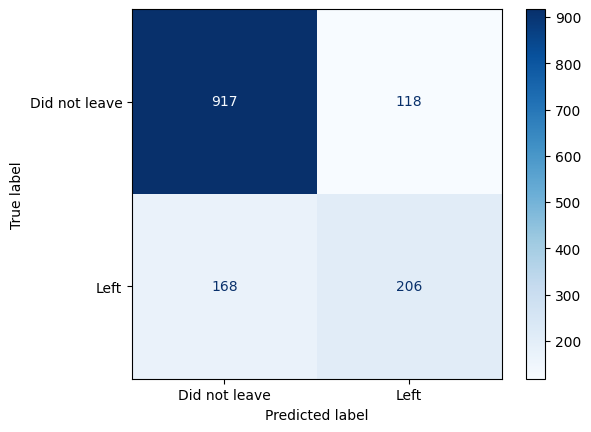

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Make predictions on the test set
y_pred = (xgb_model.predict(xgb.DMatrix(X_test)) > 0.5).astype(int)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did not leave", "Left"])
disp.plot(values_format='d', cmap='Blues')


In the confusion matrix, we can see that 1035 people that 'Did not leave', 917(91%) were correctly classified. And of the 374 people that 'left the company', 168 (52%) were correctly classified. SO the XGBoost model was not awesome. Part of the problem is that our data is imbalanced, which we saw in the confusion matrix. Let's try to improve predictions using Cross validation to optimize the parameters.


#*Optimize Parameters using Cross Validation and GridSearch()*

XGBoost has a lot of hyperparameters, parameters that we have to manual configure and are not determined by XGBoost itself, including max_depth, the maximum tree depth, learning_rate, or "eta", gamma, the parameter that encourages pruning, and reg_lambda, the regularization parameter lambda. So let's try to find the optimal values for these hyperparameters in hopes that we can improve the accuracy with the Testing Dataset.

As we have many hyperparameters to optimize, we use GridSearchCV(). We specify a some values for hyperparameters and GridSearchCV() tests all possible combinations of the parameters for us.

NOTE: When data are imbalanced, the XGBoost manual says...
If we care only about the overall performance metric (AUC) of your prediction, balance the positive and negative weights via scale_pos_weight. Use AUC for evaluation.

In [51]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5] 

}

In [116]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    seed=42,
    subsample=0.9,
    colsample_bytree=0.5)

In [126]:
##### With GRIDSEARCHCV Method

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,        # Number of cross-validation folds
    verbose=3    # Display progress logs
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 3}
Best score: 0.8669699395010436


In [52]:
best_xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    gamma=0,
    learning_rate=0.05,
    max_depth=4,
    reg_lambda=10.0,
    scale_pos_weight=3,
    subsample=0.9,
    colsample_bytree=0.5,
    early_stopping_rounds=10 ,
    eval_metric='aucpr'  # Include eval_metric as part of the model's initialization
)

# Train the classifier
best_xgb_clf.fit(
    X_train,
    y_train,
    verbose=True,
    eval_set=[(X_test, y_test)],  # Validation data
     # Enable early stopping
)


[0]	validation_0-aucpr:0.57744
[1]	validation_0-aucpr:0.59555
[2]	validation_0-aucpr:0.61476
[3]	validation_0-aucpr:0.61846
[4]	validation_0-aucpr:0.61724
[5]	validation_0-aucpr:0.61737
[6]	validation_0-aucpr:0.62227
[7]	validation_0-aucpr:0.62260
[8]	validation_0-aucpr:0.62625
[9]	validation_0-aucpr:0.62644
[10]	validation_0-aucpr:0.62916
[11]	validation_0-aucpr:0.62961
[12]	validation_0-aucpr:0.63054
[13]	validation_0-aucpr:0.63209
[14]	validation_0-aucpr:0.64049
[15]	validation_0-aucpr:0.63879
[16]	validation_0-aucpr:0.63929
[17]	validation_0-aucpr:0.63975
[18]	validation_0-aucpr:0.64568
[19]	validation_0-aucpr:0.64623
[20]	validation_0-aucpr:0.65469
[21]	validation_0-aucpr:0.65610
[22]	validation_0-aucpr:0.65777
[23]	validation_0-aucpr:0.65210
[24]	validation_0-aucpr:0.65230
[25]	validation_0-aucpr:0.65252
[26]	validation_0-aucpr:0.65121
[27]	validation_0-aucpr:0.64595
[28]	validation_0-aucpr:0.64663
[29]	validation_0-aucpr:0.64615
[30]	validation_0-aucpr:0.64551
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

c:\DSP\Machine_Learning_projects\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


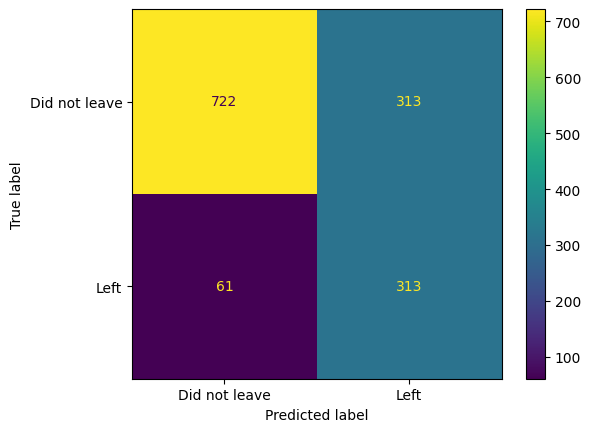

In [53]:
plot_confusion_matrix(best_xgb_clf,
                      X_test, y_test, values_format = 'd',
                      display_labels = ['Did not leave', 'Left'])

*/We can see that optimized XGBOOST model is a lot better at identifying that left the company. of the 374 people that left the company, 313(84%) were correctly identified. Before optimization, we only correctly identified 168(51%). 
However this improvement was at the expense of not being able to correctly classify as many people that did not leave. Before Optimization, we correctly identified 917(91%) people that did not leave. Now we only correctly classify 722 (70%). That said, this trade off may be better for the company because now it can focus resources on the people that leave if that will hep them retain them*?

WIll Draw the first XGBoost Tree and discuss how to interpret it.

In [54]:
xgb_clf = xgb.XGBClassifier(seed = 42, 
    objective='binary:logistic',
    gamma=0,
    learning_rate=0.05,
    max_depth=4,
    reg_lambda=10.0,
    scale_pos_weight=3,
    subsample=0.9,
    colsample_bytree=0.5,
    n_estimators = 1
      # Include eval_metric as part of the model's initialization
)

# Train the classifier
xgb_clf.fit(
    X_train,
    y_train)  # Validation data
     # Enable early stopping

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)